In [2]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import text


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


/var/folders/1z/ktpxv7kx1hj6s3h9sw04p4_w0000gn/T/ipykernel_3841/2880897608.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['station', 'measurement']


In [8]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session

session = Session(engine)
conn = engine.connect()

In [10]:
#view data (Measurment)
query = text("""SELECT * from measurement""")
df = pd.read_sql(query, con=conn)
df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [11]:
#view data (Station)
query = text("""Select * From station LIMIT 10""")
dfs = pd.read_sql(query, con=conn)
dfs

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [12]:
print("Tables available in the database:", Base.classes.keys())

Tables available in the database: ['station', 'measurement']


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
query = text("SELECT max(date) FROM measurement")
result = conn.execute(query).fetchall()

print(result)


[('2017-08-23',)]


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
#Raw SQL
query = text("""SELECT 
                    id,
                    station,
                    date,
                    prcp
                FROM 
                    measurement
                WHERE
                    date >='2016-08-23'
                ORDER By
                    date;""")
df1 = pd.read_sql(query, con=conn)
df1.head()

,id,station,date,prcp
0,2364,USC00519397,2016-08-23,0.00
1,5091,USC00513117,2016-08-23,0.15
2,7331,USC00514830,2016-08-23,0.05
3,8825,USC00517948,2016-08-23,NaN
4,11851,USC00519523,2016-08-23,0.02


In [16]:
#orm
rows = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp).filter(Measurement.date >='2016-08-23').order_by(Measurement.date).all()
df1 = pd.DataFrame(rows)
df1.head()

,id,station,date,prcp
0,2364,USC00519397,2016-08-23,0.00
1,5091,USC00513117,2016-08-23,0.15
2,7331,USC00514830,2016-08-23,0.05
3,8825,USC00517948,2016-08-23,NaN
4,11851,USC00519523,2016-08-23,0.02


In [17]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [18]:
# Retrieve the last 12 months
last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [19]:
# Retrieve the last 12 months of precipitation data
p_results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
p_results

[('2016-08-24', 1.555),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.064),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.636),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.27599999999999997),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333334),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285713),
 ('2016-09-17', 0.136),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 0.2057142857142857),
 ('2016-09-23', 0.2

In [20]:
#Sort the dataframe by date
precipitation_df = pd.DataFrame(p_results, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


<Figure size 1000x600 with 0 Axes>

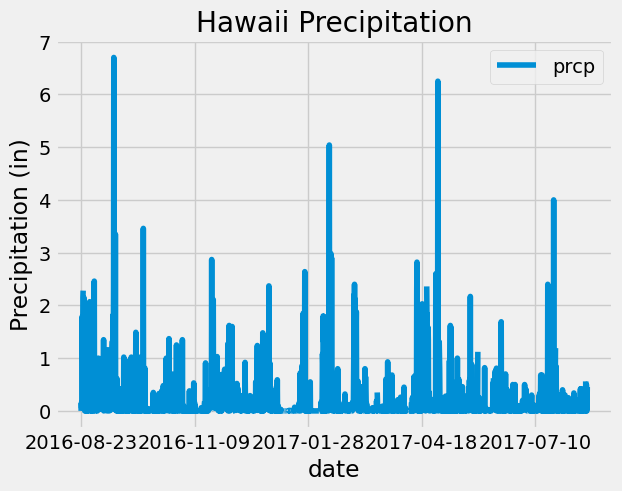

In [21]:
#plot 
plt.figure(figsize=(10,6))
df1.plot(x="date", y="prcp")
plt.title("Hawaii Precipitation")
plt.ylabel("Precipitation (in)")
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [22]:
print("Tables available in the database:", Base.classes.keys())

Tables available in the database: ['station', 'measurement']


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
query = text("""SELECT COUNT(*) FROM station""")

# Execute the query and fetch the result
result = conn.execute(query).fetchall()
total_stations = result[0][0]

# Print the total number of stations
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [24]:
query = text("""SELECT * FROM station LIMIT 10""")
dfs = pd.read_sql(query, con=conn)
print(dfs)

   id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US  21.27160   
1   2  USC00513117                    KANEOHE 838.1, HI US  21.42340   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130   
3   4  USC00517948                       PEARL CITY, HI US  21.39340   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920   
5   6  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556   
6   7  USC00519281                     WAIHEE 837.5, HI US  21.45167   
7   8  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520   
8   9  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310   

   longitude  elevation  
0 -157.81680        3.0  
1 -157.80150       14.6  
2 -157.83740        7.0  
3 -157.97510       11.9  
4 -158.01110      306.6  
5 -157.71139       19.5  
6 -157.84889       32.9  
7 -157.99920        0.9  
8 -157.80250      152.4  


In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("""
    SELECT station, COUNT(*) AS station_count
    FROM measurement
    GROUP BY station
    ORDER BY station_count DESC
""")

active_stations = pd.read_sql(query, con=conn)
print(active_stations)

       station  station_count
0  USC00519281           2772
1  USC00519397           2724
2  USC00513117           2709
3  USC00519523           2669
4  USC00516128           2612
5  USC00514830           2202
6  USC00511918           1979
7  USC00517948           1372
8  USC00518838            511


In [26]:
#ORM 
most_active_stations = session.query(Measurement.station, func.count(Measurement.station).label('station_count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = most_active_stations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(
    func.min(Measurement.tobs).label('min_temp'),
    func.max(Measurement.tobs).label('max_temp'),
    func.avg(Measurement.tobs).label('avg_temp')
).filter(Measurement.station == most_active_station).all()

# Extract the results
min_temp, max_temp, avg_temp = temperature_stats[0]

# Print the results for the most active station
print(f"Station {most_active_station} - Temperature Stats:")
print(f"Lowest Temperature: {min_temp}°F")
print(f"Highest Temperature: {max_temp}°F")
print(f"Average Temperature: {avg_temp}°F")

Station USC00519281 - Temperature Stats:
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66378066378067°F


In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [30]:
tobs_over_12_months = session.query(Measurement.station, Station.name, Measurement.date, Measurement.tobs).\
filter(Measurement.station == Station.station).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").\
order_by(Measurement.date).all()

In [31]:
# highest_temperature_observations.count()

highest_tobs_over_12_months = pd.DataFrame(tobs_over_12_months)

highest_tobs_over_12_months_df = highest_tobs_over_12_months.rename(columns={"station" : "Station", "name" : "Name", "date" : "Date", "tobs" : "Time of Observation Bias"})

highest_tobs_over_12_months_df.head(10)

,Station,Name,Date,Time of Observation Bias
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0
5,USC00519281,"WAIHEE 837.5, HI US",2016-08-28,73.0
6,USC00519281,"WAIHEE 837.5, HI US",2016-08-29,78.0
7,USC00519281,"WAIHEE 837.5, HI US",2016-08-30,77.0
8,USC00519281,"WAIHEE 837.5, HI US",2016-08-31,78.0
9,USC00519281,"WAIHEE 837.5, HI US",2016-09-01,80.0


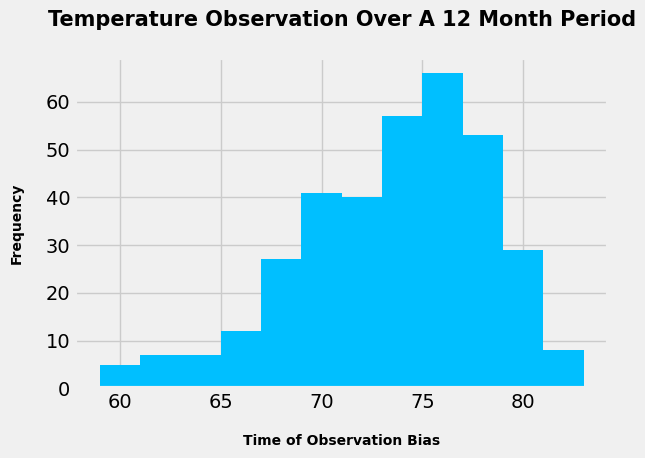

In [32]:
plt.hist(highest_tobs_over_12_months_df["Time of Observation Bias"],bins=12, color="deepskyblue", alpha=1.0);

plt.title("Temperature Observation Over A 12 Month Period\n", weight="bold", size=15);
plt.xlabel("\nTime of Observation Bias", weight="bold", size=10);
plt.ylabel("Frequency\n", weight="bold", size=10)

plt.tight_layout()

plt.savefig("TOBS_OVER_12_MONTHS.png")

# Close Session

In [34]:
# Close Session
session.close()
